In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import numpy

In [3]:
import random

*Create Dataset*

In [4]:
dataset_dir=r"D:\UNIVERISTY\GROWTH\CNN based projects\Cats_vs_Dogs\Cats and dogs pic\PetImages"

In [5]:
#Aim is to define classes as well as to create proper data set that is each image should be labelled cats or dogs
class_labels=['Cat','Dog']
    

cat_image_paths = [os.path.join(dataset_dir, 'Cat', filename) for filename in os.listdir(os.path.join(dataset_dir, 'Cat'))]
dog_image_paths = [os.path.join(dataset_dir, 'Dog', filename) for filename in os.listdir(os.path.join(dataset_dir, 'Dog'))]

all_image_paths = cat_image_paths + dog_image_paths

In [6]:
# Create labels based on file paths (0 for cats, 1 for dogs)
all_image_labels = [0] * len(cat_image_paths) + [1] * len(dog_image_paths)
all_image_labels=list(all_image_labels)

In [7]:

#Create df frame
df=pd.DataFrame()
df['Images']=all_image_paths
df['Labels']=all_image_labels

#df.sample is typically used to randomly smample a data (IT is needed to shuffle the data)
df=df.sample(frac=1).reset_index(drop=True)

df.head()

,Images,Labels
0,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
1,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
2,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,1
3,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
4,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0


In [8]:
df['Labels']=df['Labels'].astype('str')

In [9]:
df.head()

,Images,Labels
0,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
1,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
2,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,1
3,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
4,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0


# EXPLORING THE DATA

In [10]:
#Sets the grid to show case 4 images as 2 by 2


temp=df[df['Labels']==1]['Images']

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img  # Correct import
import PIL.Image
# Assuming 'temp' is a list of file paths to images
# Example:
# temp = ['path/to/image1.jpg', 'path/to/image2.jpg', ...]

# Number of images to display in the grid
num_images = 4

# Set the figure size appropriately for a grid
plt.figure(figsize=(8, 8))

# Randomly select a starting point
start = random.randint(0, len(temp) - num_images)
files = temp[start:start + num_images]

# Loop through the selected files and plot them
for index, file in enumerate(files):
    plt.subplot(2, 2, index + 1)  # 2x2 grid
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')  # Change title as needed
    plt.axis('off')

plt.show()


In [11]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2, random_state=42)

In [12]:
train.head()

,Images,Labels
11794,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,1
17139,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
15666,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0
3947,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,1
21841,D:\UNIVERISTY\GROWTH\CNN based projects\Cats_v...,0


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#augmentaion of images

train_generator=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=True,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

val_generator=ImageDataGenerator(
    rescale=1./255

)

train_iterator=train_generator.flow_from_dataframe(train,x_col='Images',
                                                   y_col='Labels',
                                                   target_size=(128,128),
                                                    batch_size=64,
                                                    class_mode='binary')

val_iterator=val_generator.flow_from_dataframe(test,x_col='Images',
                                                   y_col='Labels',
                                                   target_size=(128,128),
                                                    batch_size=64,
                                                    class_mode='binary')

Found 19967 validated image filenames belonging to 2 classes.


d:\UNIVERISTY\GROWTH\CNN based projects\Cats_vs_Dogs\ml_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(


Found 4992 validated image filenames belonging to 2 classes.


d:\UNIVERISTY\GROWTH\CNN based projects\Cats_vs_Dogs\ml_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [16]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



In [17]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10


d:\UNIVERISTY\GROWTH\CNN based projects\Cats_vs_Dogs\ml_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/312 ━━━━━━━━━━━━━━━━━━━━ 3:11 1s/step - accuracy: 0.5258 - loss: 0.6902

d:\UNIVERISTY\GROWTH\CNN based projects\Cats_vs_Dogs\ml_env\lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


312/312 ━━━━━━━━━━━━━━━━━━━━ 5237s 17s/step - accuracy: 0.5612 - loss: 0.6744 - val_accuracy: 0.6821 - val_loss: 0.5806
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 231s 734ms/step - accuracy: 0.6739 - loss: 0.6007 - val_accuracy: 0.6999 - val_loss: 0.5526
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 218s 692ms/step - accuracy: 0.7326 - loss: 0.5286 - val_accuracy: 0.7738 - val_loss: 0.4672
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 690ms/step - accuracy: 0.7727 - loss: 0.4743 - val_accuracy: 0.8121 - val_loss: 0.4097
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 216s 686ms/step - accuracy: 0.8000 - loss: 0.4301 - val_accuracy: 0.8235 - val_loss: 0.3899
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 218s 691ms/step - accuracy: 0.8227 - loss: 0.3894 - val_accuracy: 0.8584 - val_loss: 0.3228
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 218s 691ms/step - accuracy: 0.8403 - loss: 0.3615 - val_accuracy: 0.8442 - val_loss: 0.3414
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 688ms/step - accuracy: 0.8439 - loss: 0.349

<Figure size 640x480 with 0 Axes>

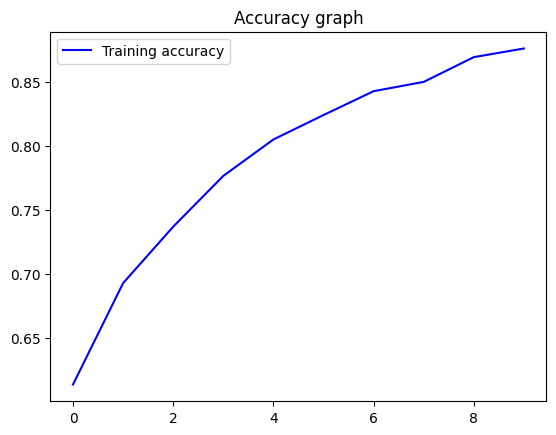

<Figure size 640x480 with 0 Axes>

In [20]:
acc=history.history['accuracy']
epochs=range(len(acc))


plt.plot(epochs,acc,'b',label='Training accuracy')
plt.title("Accuracy graph")
plt.legend()
plt.figure()


In [ ]:
print(type(test))

Testing model for an image

In [8]:
from PIL import Image
import numpy as np

# Load and preprocess the image
random_image_path='Cat1.jpg'
def preprocess_image(random_image_path):
    image = Image.open(random_image_path)
    image = image.resize((128, 128))
    image = np.array(image)
    image = image / 255.0  # Rescale to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image


predictions = model.predict(preprocess_image(random_image_path))
# Make predictions
probability = predictions[0][0]  # Extract the probability (assuming batch size of 1 and single output)
if probability>0.5:
    print("Image is a Dog")
else:
    print("Image is a Cat")
print(f'Probability of being positive class: {probability:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image is a Cat
Probability of being positive class: 0.0267


In [22]:
model.save('Cats_vs_dogs_base_model_v1.h5')

Loading a Model and using it to predict for an image

In [6]:

import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('Cats_vs_dogs_base_model_v1.h5')

In [7]:
from PIL import Image
import numpy as np

# Load and preprocess the image
random_image_path = 'Dog1.jpg'
image = Image.open(random_image_path)
image = image.resize((128, 128))
image = np.array(image)
image = image / 255.0  # Rescale to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension
predictions = model.predict(image)
# Make predictions
probability = predictions[0][0]  # Extract the probability (assuming batch size of 1 and single output)
if probability>0.5:
    print("Image is a Dog")
else:
    print("Image is a Cat")
print(f'Probability of being positive class: {probability:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Image is a Dog
Probability of being positive class: 0.9972
